# =============================================================
# MILESTONE 2: Advanced Data Analysis and Feature Engineering
# =============================================================

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

from scipy import stats
from scipy.stats import f_oneway, chi2_contingency

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
# Set plotting style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
url = "https://raw.githubusercontent.com/Reemsoliiman/customer-churn-prediction-analysis/main/data/interim/initial_cleaned_data.csv"
df = pd.read_csv(url)

print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")

Dataset loaded: 3333 rows, 77 columns


# ========================
# 1. Statistical Tests
# ========================

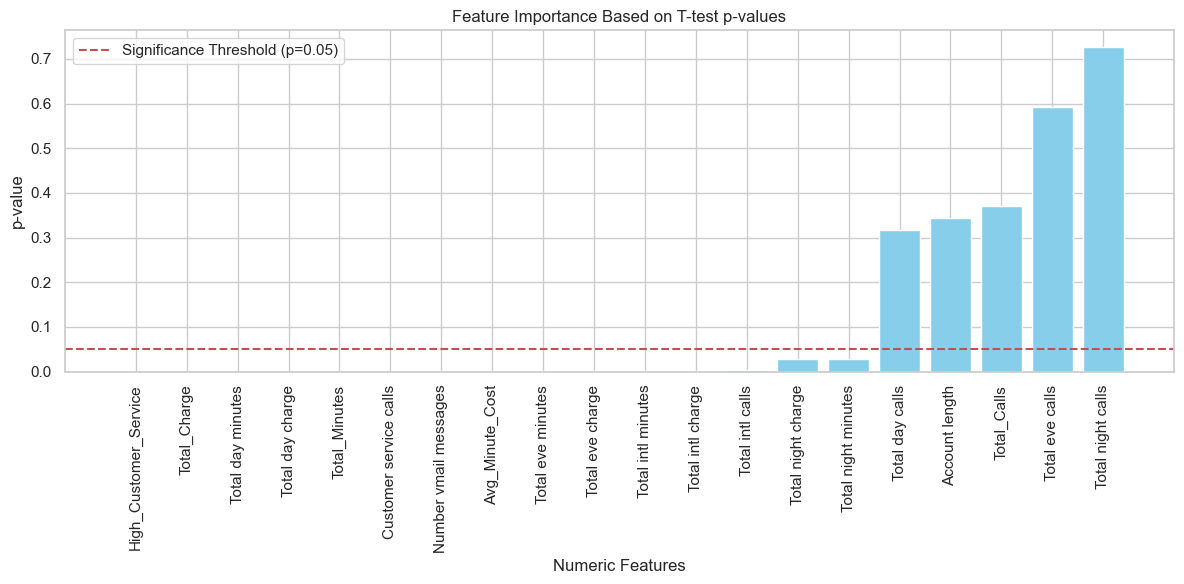

T-test p-values ordered by importance (lowest to highest):
High_Customer_Service: p-value = 0.0000
Total_Charge: p-value = 0.0000
Total day minutes: p-value = 0.0000
Total day charge: p-value = 0.0000
Total_Minutes: p-value = 0.0000
Customer service calls: p-value = 0.0000
Number vmail messages: p-value = 0.0000
Avg_Minute_Cost: p-value = 0.0000
Total eve minutes: p-value = 0.0000
Total eve charge: p-value = 0.0000
Total intl minutes: p-value = 0.0002
Total intl charge: p-value = 0.0002
Total intl calls: p-value = 0.0032
Total night charge: p-value = 0.0278
Total night minutes: p-value = 0.0278
Total day calls: p-value = 0.3165
Account length: p-value = 0.3433
Total_Calls: p-value = 0.3709
Total eve calls: p-value = 0.5912
Total night calls: p-value = 0.7273

Significant features (p < 0.05):
High_Customer_Service: p-value = 0.0000
Total_Charge: p-value = 0.0000
Total day minutes: p-value = 0.0000
Total day charge: p-value = 0.0000
Total_Minutes: p-value = 0.0000
Customer service calls:

In [4]:
## T-test for Numeric Features

# Identify numeric features
numeric_features = df.select_dtypes(include=[np.number]).columns
target = 'Churn'

# Perform t-tests for each numeric feature
t_test_results = {}
for feature in numeric_features:
    if feature != target:  # Exclude the target variable
        group1 = df[df[target] == False][feature].dropna()
        group2 = df[df[target] == True][feature].dropna()
        t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
        t_test_results[feature] = p_value

# Sort features by p-value
sorted_results = dict(sorted(t_test_results.items(), key=lambda x: x[1]))

# Prepare data for visualization
features = list(sorted_results.keys())
p_values = list(sorted_results.values())

# Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(features, p_values, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Numeric Features')
plt.ylabel('p-value')
plt.title('Feature Importance Based on T-test p-values')
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Threshold (p=0.05)')
plt.legend()
plt.tight_layout()
plt.savefig(f'../visualizations/enhanced/feature_importance_based_on_T-test_p-values.png')
plt.show()

# Display results
print("T-test p-values ordered by importance (lowest to highest):")
for feature, p_value in sorted_results.items():
    print(f"{feature}: p-value = {p_value:.4f}")

# Highlight significant features (p < 0.05)
significant_features_ttest = {k: v for k, v in sorted_results.items() if v < 0.05}
print("\nSignificant features (p < 0.05):")
for feature, p_value in significant_features_ttest.items():
    print(f"{feature}: p-value = {p_value:.4f}")



Chi-squared Test Results:


,Feature,Chi2,p-value
52,International plan_Yes,222.565757,2.493108e-50
53,Voice mail plan_Yes,34.131660,5.150640e-09
30,State_NJ,7.082219,7.785253e-03
42,State_TX,5.720015,1.677259e-02
19,State_MD,4.757345,2.917352e-02
44,State_VA,3.435014,6.382803e-02
39,State_SC,3.162475,7.534888e-02
3,State_CA,3.061232,8.018087e-02
2,State_AZ,2.930757,8.690672e-02
21,State_MI,2.737304,9.803006e-02



Significant Features (p < 0.05):


,Feature,Chi2,p-value
52,International plan_Yes,222.565757,2.493108e-50
53,Voice mail plan_Yes,34.131660,5.150640e-09
30,State_NJ,7.082219,7.785253e-03
42,State_TX,5.720015,1.677259e-02
19,State_MD,4.757345,2.917352e-02


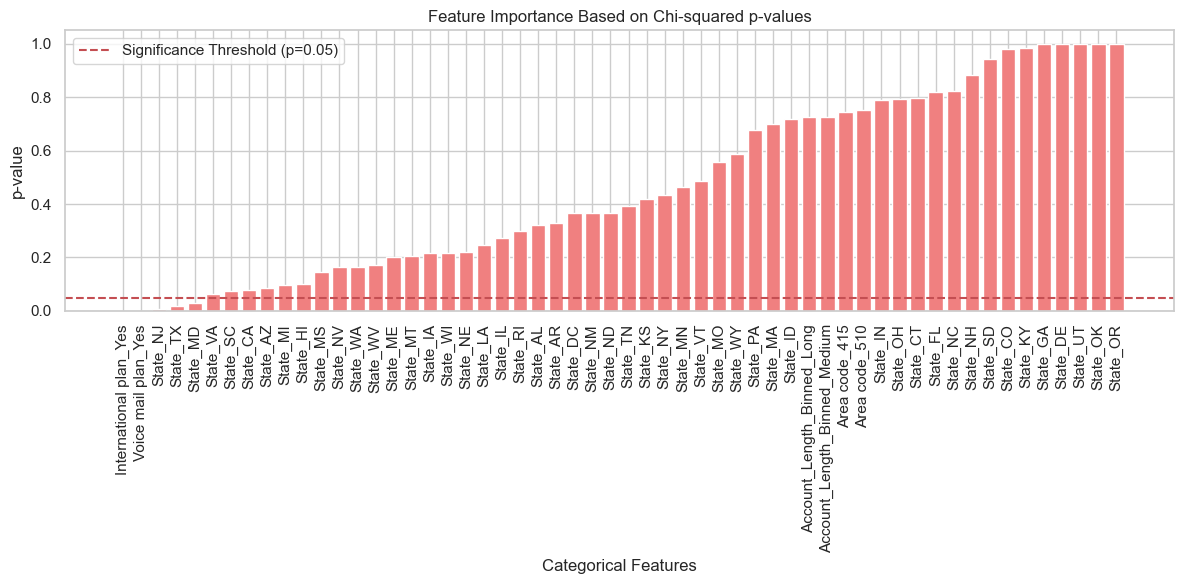

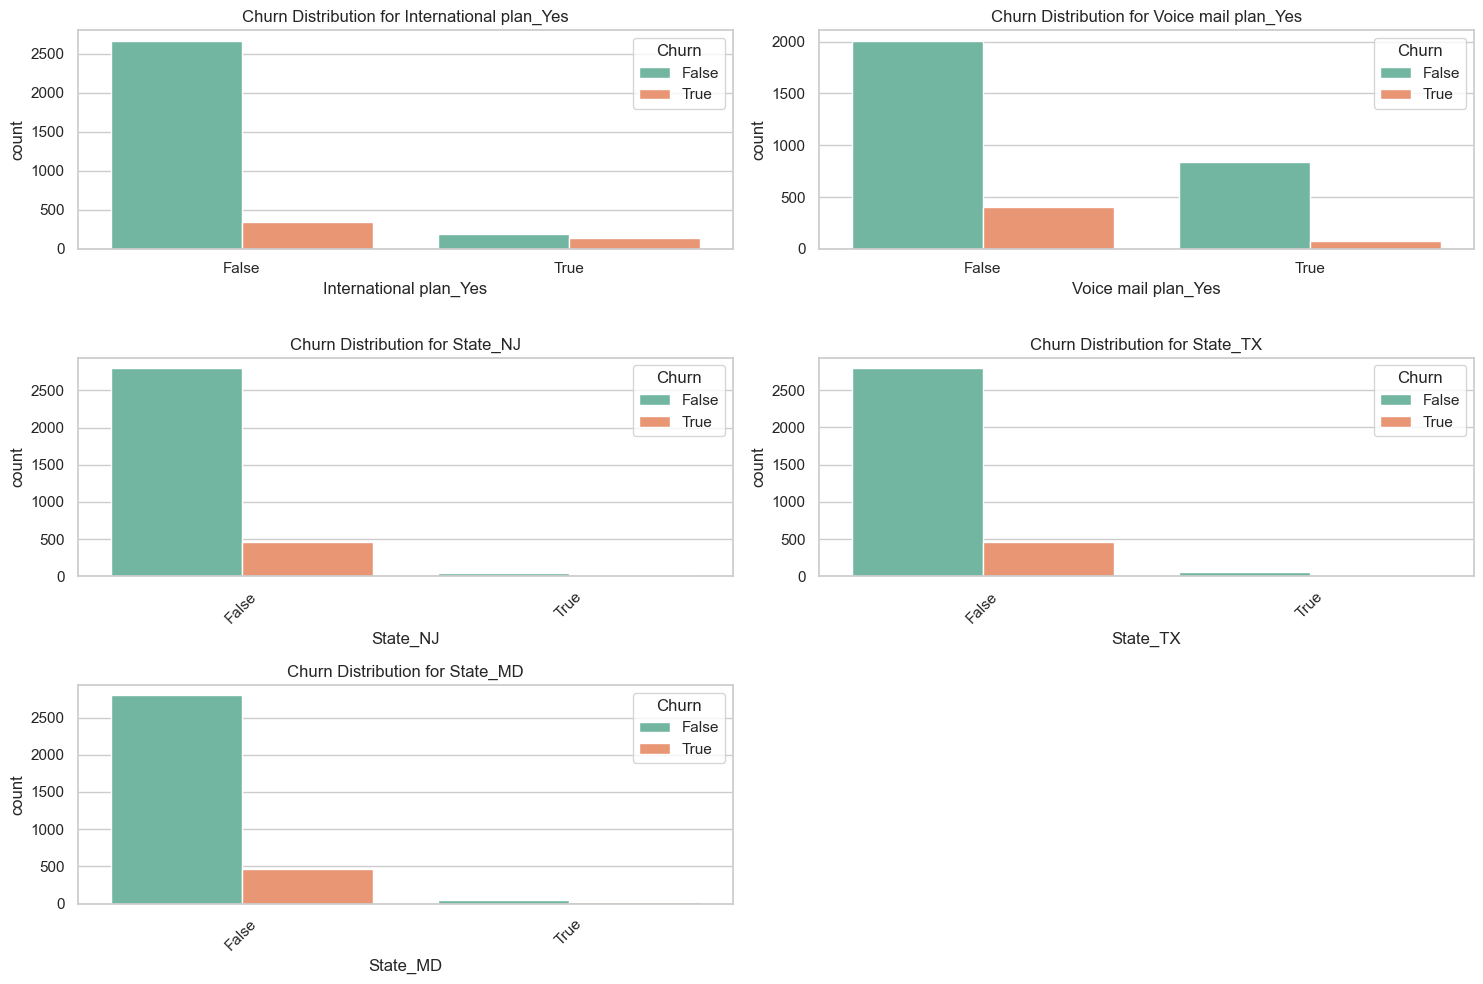

International plan_Yes: p-value=0.0000 --> Significant
Voice mail plan_Yes: p-value=0.0000 --> Significant
State_NJ: p-value=0.0078 --> Significant
State_TX: p-value=0.0168 --> Significant
State_MD: p-value=0.0292 --> Significant
State_VA: p-value=0.0638 --> Not Significant
State_SC: p-value=0.0753 --> Not Significant
State_CA: p-value=0.0802 --> Not Significant
State_AZ: p-value=0.0869 --> Not Significant
State_MI: p-value=0.0980 --> Not Significant
State_HI: p-value=0.1001 --> Not Significant
State_MS: p-value=0.1465 --> Not Significant
State_NV: p-value=0.1645 --> Not Significant
State_WA: p-value=0.1645 --> Not Significant
State_WV: p-value=0.1729 --> Not Significant
State_ME: p-value=0.2005 --> Not Significant
State_MT: p-value=0.2044 --> Not Significant
State_IA: p-value=0.2150 --> Not Significant
State_WI: p-value=0.2157 --> Not Significant
State_NE: p-value=0.2202 --> Not Significant
State_LA: p-value=0.2466 --> Not Significant
State_IL: p-value=0.2743 --> Not Significant
State

In [5]:
## Chi-Square Test for Categorical Features

# Define categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = [col for col in df.columns if col not in numeric_cols]
target = 'Churn'

# Perform Chi-squared tests
chi2_results = []
for col in categorical_cols:
    if col != target: 
        contingency_table = pd.crosstab(df[col], df[target])
        chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
        chi2_results.append({"Feature": col, "Chi2": chi2, "p-value": p})

# Convert to DataFrame and sort by p-value
chi2_df = pd.DataFrame(chi2_results).sort_values("p-value")

# Display results
print("\nChi-squared Test Results:")
display(chi2_df)

# Highlight significant features (p < 0.05)
significant_features_chi2 = chi2_df[chi2_df['p-value'] < 0.05]
print("\nSignificant Features (p < 0.05):")
display(significant_features_chi2)

# Visualize feature importance with bar chart
plt.figure(figsize=(12, 6))
plt.bar(chi2_df['Feature'], chi2_df['p-value'], color='lightcoral')
plt.xticks(rotation=90)
plt.xlabel('Categorical Features')
plt.ylabel('p-value')
plt.title('Feature Importance Based on Chi-squared p-values')
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Threshold (p=0.05)')
plt.legend()
plt.tight_layout()
plt.savefig(f'../visualizations/enhanced/feature_importance_based_on_Chi-squared_p-values.png')
plt.show()

# Additional visualization: Countplot for significant features
plt.figure(figsize=(15, 10))
n_cols = 2
n_rows = int(np.ceil(len(significant_features_chi2) / n_cols))
for i, row in enumerate(significant_features_chi2.itertuples(), 1):
    col = row.Feature
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df, x=col, hue=target, palette='Set2')
    plt.title(f'Churn Distribution for {col}')
    plt.xticks(rotation=45 if 'State' in col else 0)
    plt.legend(title='Churn', labels=['False', 'True'])
plt.tight_layout()
plt.savefig('../visualizations/enhanced/countplot_significant_features.png')
plt.show()

# Print significance status for each feature
for i, row in chi2_df.iterrows():
    signif = "Significant" if row["p-value"] < 0.05 else "Not Significant"
    print(f"{row['Feature']}: p-value={row['p-value']:.4f} --> {signif}")

In [6]:
## Summarize Significant Features
# Combine significant features from t-tests and chi-square tests
significant_features = pd.concat([
    pd.DataFrame({
        'Feature': list(significant_features_ttest.keys()),
        'Test': 'T-test',
        'P-Value': list(significant_features_ttest.values())
    }),
    chi2_df[chi2_df['p-value'] < 0.05][['Feature', 'p-value']].rename(columns={'p-value': 'P-Value'}).assign(Test='Chi-Square')
]).reset_index(drop=True)
significant_features['P-Value'] = significant_features['P-Value'].round(4)

# Display summary
print("\nSummary of Significant Features (p < 0.05):")
display(significant_features)


Summary of Significant Features (p < 0.05):


,Feature,Test,P-Value
0,High_Customer_Service,T-test,0.0000
1,Total_Charge,T-test,0.0000
2,Total day minutes,T-test,0.0000
3,Total day charge,T-test,0.0000
4,Total_Minutes,T-test,0.0000
5,Customer service calls,T-test,0.0000
6,Number vmail messages,T-test,0.0000
7,Avg_Minute_Cost,T-test,0.0000
8,Total eve minutes,T-test,0.0000
9,Total eve charge,T-test,0.0000


In [7]:
## Highlight Key Patterns

# Mean values for significant numeric features
significant_numeric = significant_features[significant_features['Test'] == 'T-test']['Feature'].tolist()
mean_by_churn = df.groupby('Churn')[significant_numeric].mean().round(2).T
mean_by_churn.columns = ['Non-Churned', 'Churned']

# Churn rate by tenure group
tenure_groups = pd.cut(df['Customer tenure'], bins=[0, 12, 24, 36, 48, 60, float('inf')], 
                       labels=['0-12', '13-24', '25-36', '37-48', '49-60', '60+'])
churn_rate_by_tenure = df.groupby(tenure_groups, observed=True)['Churn'].mean().round(4) * 100

# Churn rate by significant categorical features
significant_categorical = significant_features[significant_features['Test'] == 'Chi-Square']['Feature'].tolist()
churn_rate_by_categorical = {col: df.groupby(col)['Churn'].mean().round(4) * 100 for col in significant_categorical}

# Display key patterns
print("\nMean Values for Significant Numeric Features:")
display(mean_by_churn)
# print("\nChurn Rate by Tenure Group (%):")
# display(churn_rate_by_tenure)
# print("\nChurn Rate by Significant Categorical Features (%):")
# for col, rates in churn_rate_by_categorical.items():
#     print(f"\n{col}:")
#     display(rates)

# Visualize churn rate by tenure
plt.figure(figsize=(8, 6))
churn_rate_by_tenure.plot(kind='bar', color='lightgreen')
plt.xlabel('Tenure Group (Months)')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Tenure Group')
plt.tight_layout()
plt.savefig('../visualizations/enhanced/churn_rate_by_tenure.png')
plt.show()

## Visualize Churn Rate by Significant Categorical Features 
plt.figure(figsize=(15, 10))
n_cols = 2
n_rows = int(np.ceil(len(significant_categorical) / n_cols))
for i, col in enumerate(significant_categorical, 1):
    plt.subplot(n_rows, n_cols, i)
    churn_rate = df.groupby(col)['Churn'].mean().round(4) * 100
    churn_rate.plot(kind='bar', color='lightcoral')
    plt.title(f'Churn Rate by {col} (%)')
    plt.xlabel(col)
    plt.ylabel('Churn Rate (%)')
    plt.xticks(rotation=45 if 'State' in col else 0)
    plt.ylim(0, 100)
plt.tight_layout()
plt.savefig('../visualizations/enhanced/churn_rate_by_categorical.png')
plt.show()

KeyError: 'Customer tenure'

In [ ]:
## Address Non-Significant Features

# Non-significant features from t-tests
non_significant_ttest = {k: v for k, v in sorted_results.items() if v >= 0.05}
non_significant_chi2 = chi2_df[chi2_df['p-value'] >= 0.05][['Feature', 'p-value']].rename(columns={'p-value': 'P-Value'})

# Combine non-significant features
non_significant_features = pd.concat([
    pd.DataFrame({
        'Feature': list(non_significant_ttest.keys()),
        'Test': 'T-test',
        'P-Value': list(non_significant_ttest.values())
    }),
    non_significant_chi2.assign(Test='Chi-Square')
]).reset_index(drop=True)
non_significant_features['P-Value'] = non_significant_features['P-Value'].round(4)

# Display non-significant features
print("\nNon-Significant Features (p >= 0.05):")
display(non_significant_features)


Non-Significant Features (p >= 0.05):


,Feature,Test,P-Value
0,log_average_daily_usage,T-test,0.0933
1,Total day calls,T-test,0.3165
2,Account length,T-test,0.3433
3,Customer tenure,T-test,0.3433
4,Total_Calls,T-test,0.3709
...,...,...,...
57,State_DE,Chi-Square,1.0000
58,State_GA,Chi-Square,1.0000
59,State_OK,Chi-Square,1.0000
60,State_OR,Chi-Square,1.0000


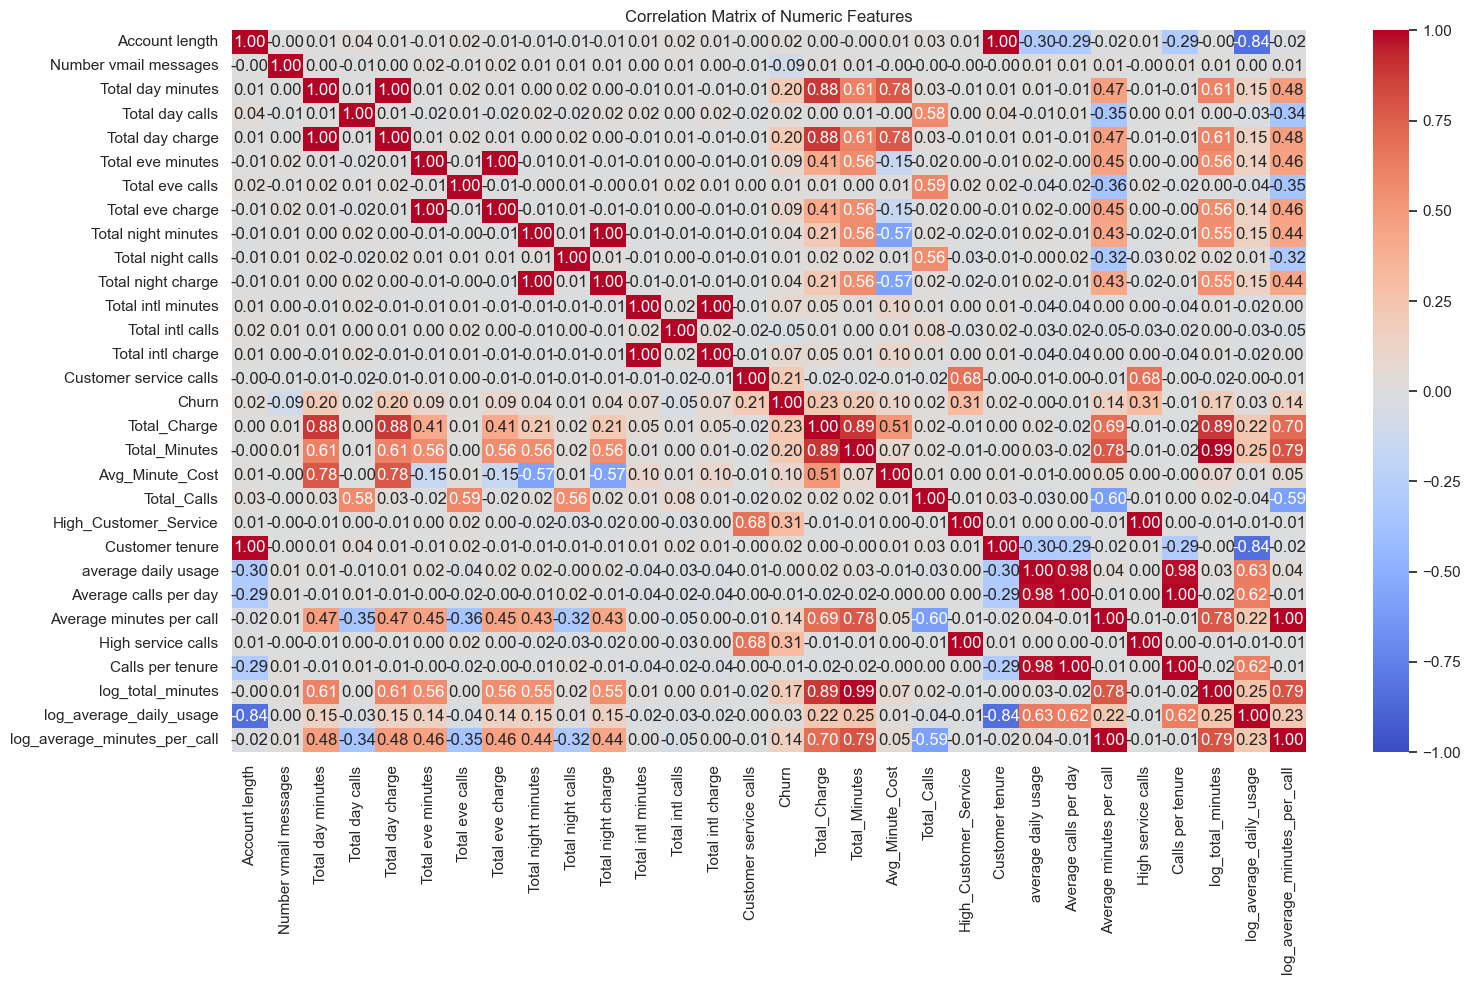


Highly Correlated Feature Pairs (|correlation| > 0.7):
Account length and Customer tenure: 1.00
Account length and log_average_daily_usage: -0.84
Total day minutes and Total day charge: 1.00
Total day minutes and Total_Charge: 0.88
Total day minutes and Avg_Minute_Cost: 0.78
Total day charge and Total_Charge: 0.88
Total day charge and Avg_Minute_Cost: 0.78
Total eve minutes and Total eve charge: 1.00
Total night minutes and Total night charge: 1.00
Total intl minutes and Total intl charge: 1.00
Total_Charge and Total_Minutes: 0.89
Total_Charge and log_total_minutes: 0.89
Total_Charge and log_average_minutes_per_call: 0.70
Total_Minutes and Average minutes per call: 0.78
Total_Minutes and log_total_minutes: 0.99
Total_Minutes and log_average_minutes_per_call: 0.79
High_Customer_Service and High service calls: 1.00
Customer tenure and log_average_daily_usage: -0.84
average daily usage and Average calls per day: 0.98
average daily usage and Calls per tenure: 0.98
Average calls per day an

In [ ]:
## Correlation Matrix for Numeric Features

# Define numeric features from statistical test results
numeric_features = df.select_dtypes(include=[np.number]).columns

# Compute correlation matrix
corr_matrix = df[numeric_features].corr(method='pearson')

# Visualize correlation matrix
plt.figure(figsize=(16, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.savefig('../visualizations/enhanced/correlation_matrix.png')
plt.show()

# Identify highly correlated pairs (|correlation| > 0.7)
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

print("\nHighly Correlated Feature Pairs (|correlation| > 0.7):")
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")

In [ ]:
## Handle Multicollinearity

# List of features to drop due to high correlations (> 0.7)
features_to_drop = [
    'Account length', # redundant with Customer tenure, non-significant
    'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge', # derived from minutes
    'High service calls', # redundant with High_Customer_Service
    'log_average_minutes_per_call',  # redundant with Average minutes per call
    'Calls per tenure', # redundant with Average calls per day
    'Total_Minutes', 'log_total_minutes', # redundant with Total_Charge
    'log_average_daily_usage', # non-significant, correlated with Account length
    'average daily usage', # non-significant, correlated with Average calls per day
    'Avg_Minute_Cost' # less significant than Total day minutes
]

# Update numeric features by removing dropped features
numeric_features = [
    'High_Customer_Service', 'Total day minutes', 'Total eve minutes', 
    'Total intl minutes', 'Total night minutes', 'Total intl calls', 
    'Number vmail messages', 'Average minutes per call', 'Total_Charge', 
    'Customer tenure', 'Total day calls', 'Average calls per day'
]

# Combine with significant categorical features
all_features = numeric_features + ['International plan_Yes', 'Voice mail plan_Yes', 'State_NJ', 'State_TX', 'State_MD']

print("Features dropped due to multicollinearity:", features_to_drop)
print("\nRetained features for RFE:", all_features)

Features dropped due to multicollinearity: ['Account length', 'Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge', 'High service calls', 'log_average_minutes_per_call', 'Calls per tenure', 'Total_Minutes', 'log_total_minutes', 'log_average_daily_usage', 'average daily usage', 'Avg_Minute_Cost']

Retained features for RFE: ['High_Customer_Service', 'Total day minutes', 'Total eve minutes', 'Total intl minutes', 'Total night minutes', 'Total intl calls', 'Number vmail messages', 'Average minutes per call', 'Total_Charge', 'Customer tenure', 'Total day calls', 'Average calls per day', 'International plan_Yes', 'Voice mail plan_Yes', 'State_NJ', 'State_TX', 'State_MD']


In [ ]:
## Prepare Data for RFE
# Define feature matrix and target
X = df[all_features]
y = df['Churn']

# Scale numeric features
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[numeric_features] = scaler.fit_transform(X[numeric_features])

## Recursive Feature Elimination (RFE)
# Initialize logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Perform RFE to select top 10 features
rfe = RFE(estimator=model, n_features_to_select=10)
rfe.fit(X_scaled, y)

# Get selected features and their rankings
rfe_results = pd.DataFrame({
    'Feature': X.columns,
    'Selected': rfe.support_,
    'Ranking': rfe.ranking_
}).sort_values('Ranking')

# Display RFE results
print("\nRFE Feature Selection Results:")
display(rfe_results)

# Selected features
selected_features = rfe_results[rfe_results['Selected'] == True]['Feature'].tolist()
print("\nSelected Features (Top 10):")
print(selected_features)

NameError: name 'StandardScaler' is not defined

# ========================
# 2. Feature Engineering
# ========================

In [ ]:
#Rename column
df['Customer tenure'] = df['Account length']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 78 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Account length                3333 non-null   float64
 1   Number vmail messages         3333 non-null   int64  
 2   Total day minutes             3333 non-null   float64
 3   Total day calls               3333 non-null   int64  
 4   Total day charge              3333 non-null   float64
 5   Total eve minutes             3333 non-null   float64
 6   Total eve calls               3333 non-null   int64  
 7   Total eve charge              3333 non-null   float64
 8   Total night minutes           3333 non-null   float64
 9   Total night calls             3333 non-null   int64  
 10  Total night charge            3333 non-null   float64
 11  Total intl minutes            3333 non-null   float64
 12  Total intl calls              3333 non-null   int64  
 13  Tot

Create derived usage features

In [ ]:
#Average daily usage
df['average daily usage'] = df['Total_Minutes'] / df['Customer tenure']

In [ ]:
#Average calls per day
df['Average calls per day'] = (
df['Total_Calls']/df['Customer tenure']
)

In [ ]:
#Average minutes per call
df['Average minutes per call'] = np.where(
    df['Total_Calls'] > 0,
    df['Total_Minutes'] / df['Total_Calls'],
    0
)

In [ ]:
#Complaint indicator
df['High service calls'] = (df['Customer service calls'] > 3).astype(int)

In [ ]:
#Interaction frequency index
df['Calls per tenure'] = df['Total_Calls'] / df['Customer tenure']

In [ ]:
#Log transform highly skewed features
for col in ['Total_Minutes', 'average daily usage', 'Average minutes per call']:
    df[f'log_{col.replace(" ", "_").lower()}'] = np.log1p(df[col])  # log1p handles zeros safely

In [ ]:
# Create tenure groups
df['Tenure_Group'] = pd.cut(df['Customer tenure'], bins=[0, 12, 24, 36, 48, 60, 72],
                            labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72'])

In [ ]:
scaler = MinMaxScaler()
numeric_features = [
    'Customer tenure',
    'Total_Minutes',
    'average daily usage',
    'Total_Calls',
    'Average calls per day',
    'Average minutes per call',
    'Calls per tenure'
]
df_scaled = df.copy()
df_scaled[numeric_features] = scaler.fit_transform(df[numeric_features])

In [ ]:
df_scaled.shape

(3333, 87)

# ========================
# 3. Feature Selection and Refinement
# ========================

In [ ]:
# # Save dataset with new features
# df_encoded.to_csv('../data/processed/cleaned_data.csv', index=False)
# print("Final processed dataset saved as 'cleaned_data.csv' in data/processed/")

# -------------------------------------
# 3. advanced visualizations
# -------------------------------------



# -------------------------------------
# 3.1.visualizations
# -------------------------------------

In [ ]:
import os
import plotly.express as px
import plotly.graph_objects as go

# Ensure the output directory exists
output_dir = "../visualizations/interactive"
os.makedirs(output_dir, exist_ok=True)

# 1. Churn Rate Pie Chart
fig_pie = px.pie(df, names='Churn', title='Churn Rate Distribution', color='Churn',
                 color_discrete_map={False: 'lightblue', True: 'salmon'})
fig_pie.write_html(os.path.join(output_dir, "churn_rate_pie.html"))
fig_pie.show()

# 2. Churn by State (Top 10 states with most churn)
state_cols = [col for col in df.columns if col.startswith('State_')]
df_states = df[state_cols + ['Churn']].copy()
df_states['State'] = df_states[state_cols].idxmax(axis=1).str.replace('State_', '')
churn_by_state = df_states[df_states['Churn'] == True]['State'].value_counts().nlargest(10)
fig_bar = px.bar(churn_by_state, x=churn_by_state.index, y=churn_by_state.values,
                 labels={'x': 'State', 'y': 'Churned Customers'},
                 title='Top 10 States by Churn Count', 
                 color=churn_by_state.values, 
                 color_continuous_scale='Reds')
fig_bar.write_html(os.path.join(output_dir, "top10_states_churn.html"))
fig_bar.show()

# 3. Distribution of Average Daily Usage by Churn
fig_hist = px.histogram(df, x='average daily usage', color='Churn', nbins=40, barmode='overlay',
                        title='Distribution of Average Daily Usage by Churn',
                        color_discrete_map={False: 'lightblue', True: 'salmon'})
fig_hist.write_html(os.path.join(output_dir, "avg_daily_usage_by_churn.html"))
fig_hist.show()

# 4. Scatter Plot: Total Minutes vs. Total Calls colored by Churn
fig_scatter = px.scatter(df, x='Total_Minutes', y='Total_Calls', color='Churn',
                         title='Total Minutes vs. Total Calls by Churn',
                         color_discrete_map={False: 'lightblue', True: 'salmon'},
                         hover_data=['Customer tenure'])
fig_scatter.write_html(os.path.join(output_dir, "minutes_vs_calls_by_churn.html"))
fig_scatter.show()

# 5. Box Plot: Customer Tenure by Churn
fig_box = px.box(df, x='Churn', y='Customer tenure', color='Churn',
                 title='Customer Tenure by Churn',
                 color_discrete_map={False: 'lightblue', True: 'salmon'})
fig_box.write_html(os.path.join(output_dir, "tenure_by_churn.html"))
fig_box.show()

# -------------------------------------
# 3.2.dashboard
# -------------------------------------

In [ ]:

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


# Color scheme
colors = {False: "royalblue", True: "crimson"}

# 1. Pie chart: Churn distribution
fig_pie = px.pie(
    df, names="Churn", color="Churn",
    color_discrete_map=colors, hole=0.4
)
fig_pie.update_traces(textinfo="percent+label", pull=[0, 0.05])

# 2. Bar chart: Top 10 states
state_cols = [col for col in df.columns if col.startswith("State_")]
df_states = df[state_cols + ["Churn"]].copy()
df_states["State"] = df_states[state_cols].idxmax(axis=1).str.replace("State_", "")
churn_by_state = df_states[df_states["Churn"] == True]["State"].value_counts().nlargest(10)
fig_bar = px.bar(
    churn_by_state, x=churn_by_state.index, y=churn_by_state.values,
    labels={"x": "State", "y": "Churned Customers"},
    color=churn_by_state.values, color_continuous_scale="Reds"
)
fig_bar.update_layout(xaxis_tickangle=-45)

# 3. Histogram: Daily usage
fig_hist = px.histogram(
    df, x="average daily usage", color="Churn", nbins=40, barmode="overlay",
    color_discrete_map=colors
)
fig_hist.update_traces(opacity=0.7)

# 4. Scatter: Minutes vs Calls
fig_scatter = px.scatter(
    df, x="Total_Minutes", y="Total_Calls", color="Churn",
    color_discrete_map=colors, hover_data=["Customer tenure"],
    size="Customer tenure", size_max=10
)

# 5. Boxplot: Tenure
fig_box = px.box(
    df, x="Churn", y="Customer tenure", color="Churn",
    color_discrete_map=colors, points="all"
)

# 6. Line chart: Tenure groups
df["Tenure_Group"] = pd.cut(df["Customer tenure"], bins=[0,12,24,36,48,60,72],
                            labels=["0-12","13-24","25-36","37-48","49-60","61-72"])
churn_by_tenure = df.groupby("Tenure_Group")["Churn"].mean().reset_index()
fig_line = px.line(
    churn_by_tenure, x="Tenure_Group", y="Churn", markers=True,
    line_shape="spline"
)
fig_line.update_traces(line=dict(width=3, color="crimson"))

# --- Combine into dashboard ---
dashboard = make_subplots(
    rows=3, cols=2,
    specs=[
        [{"type": "domain"}, {"type": "xy"}],
        [{"type": "xy"}, {"type": "xy"}],
        [{"type": "xy"}, {"type": "xy"}]
    ],
    horizontal_spacing=0.12,
    vertical_spacing=0.15
)

# Add each figure
for trace in fig_pie.data:
    dashboard.add_trace(trace, row=1, col=1)
for trace in fig_bar.data:
    dashboard.add_trace(trace, row=1, col=2)
for trace in fig_hist.data:
    dashboard.add_trace(trace, row=2, col=1)
for trace in fig_scatter.data:
    dashboard.add_trace(trace, row=2, col=2)
for trace in fig_box.data:
    dashboard.add_trace(trace, row=3, col=1)
for trace in fig_line.data:
    dashboard.add_trace(trace, row=3, col=2)

# --- Add subplot titles as annotations (graph names) ---
titles = [
    "Churn Distribution", "Top 10 States by Churn",
    "Daily Usage Distribution", "Minutes vs Calls",
    "Customer Tenure Distribution", "Churn by Tenure Groups"
]

# Adjusted positions (slightly higher than plots)
positions = [
    (0.18, 1.05), (0.82, 1.05),   # Row 1
    (0.18, 0.70), (0.82, 0.70),   # Row 2
    (0.18, 0.36), (0.82, 0.36)    # Row 3
]

for title, (x, y) in zip(titles, positions):
    dashboard.add_annotation(
        text=title,
        x=x, y=y,
        xref="paper", yref="paper",
        showarrow=False,
        font=dict(size=15, family="Arial", color="black"),
        align="center"
    )

# --- Final layout polish ---
dashboard.update_layout(
    height=1400, width=1200,
    title_text="Customer Churn Dashboard",
    title_x=0.5,
    template="plotly_white",
    legend=dict(orientation="h", y=-0.1, x=0.3),
    margin=dict(l=50, r=50, t=120, b=50)
)

dashboard.show()

# Ensure the output directory exists
output_dir = "../visualizations/interactive"
os.makedirs(output_dir, exist_ok=True)

# Save the dashboard
dashboard.write_html(os.path.join(output_dir, "churn_dashboard.html"))

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8512\1854635567.py:51: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

